# Capstone 2 : NN2

# Sentiment Analysis on Social Media Posts with LSTM

In this project, you will build a `Long Short-Term Memory (LSTM) model` that can `perform sentiment analysis on text data`, such as social media posts, customer reviews, or news articles.

You will start by `exploring a dataset` of text data, such as the `Sentiment140 dataset` or `the Amazon Reviews dataset`, and `performing EDA` to gain insights into the data.

You will `analyze the correlation` between different features and `identify any outliers` or `missing values` that need to be handled.

You will then `preprocess the dataset`, `splitting it into training and testing sets`, and `transforming the text data` into input vectors using techniques such as `tokenization` or `word embeddings`.

You will `build an LSTM model` using PyTorch or `Tensorflow` that can perform sentiment analysis on the input data.

You will `experiment with different neural network` architectures, activation functions, and learning rates to find the `best model` for the task.

Finally, you will `evaluate the performance` of your model using metrics such as `accuracy`, `precision`, `recall`, and `F1 score`, and `visualize the results` using `confusion matrices` or other visualization techniques to see how well the model performs on different sentiment classes.

Dataset URL:

The Sentiment140 dataset contains `1.6 million tweets` with `6 different sentiment classes`: positive, negative, neutral, and three other classes.
`Sentiment140` dataset: http://help.sentiment140.com/for-students/

The Amazon Reviews dataset contains `3.6 million reviews` with `binary sentiment classes`: positive or negative.
`Amazon Reviews` dataset: https://www.kaggle.com/bittlingmayer/amazonreviews

This project will give you hands-on experience with LSTM and sentiment analysis, and will help you develop skills in coding with PyTorch and Tensorflow.

It will also give you the opportunity to experiment with different neural network architectures and activation functions to find the best model for the task.

verify GPU

In [1]:
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "not available")


GPU is not available


# Data Acquisition

In [2]:
!pip install kaggle

Upload the kaggle.json file that you downloaded

In [3]:
from google.colab import files

In [4]:
uploaded = files.upload()
uploaded

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elsayedelmandoh","key":"5c832aa457ca8e68a655a8c526ca8e92"}'}

Move the uploaded kaggle.json file to the appropriate directory

In [5]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


Set permissions for the Kaggle API key

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

Download a dataset from Kaggle

In [7]:
!kaggle datasets download -d bittlingmayer/amazonreviews -p /content

amazonreviews.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzip the downloaded dataset

In [8]:
!unzip -q /content/amazonreviews.zip -d /content/dataset


replace /content/dataset/test.ft.txt.bz2? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

read data

In [9]:
import pandas as pd

Amazon Reviews

In [10]:
df_train = pd.read_csv('dataset/train.ft.txt.bz2', delimiter='\t', header=None, names=['text', 'label']).sample(100000)
df_train.head()

,text,label
3065142,__label__2 Great Item!: This tea press prepare...,NaN
2215304,__label__2 Never Looking Back: My only regret ...,NaN
402326,__label__2 Absolutely Fab!: Dr. Seuss has alwa...,NaN
1970157,__label__2 The Tempest Review: The Tempest is ...,NaN
1949880,__label__1 I hate this toy! Unstable and falls...,NaN


we have a problem in dataset, pandas read two column in one column !!

In [11]:
row = '__label__1 Not an "ultimate guide": Firstly,I enjoyed the format and tone of the book (how the author addressed the reader). However, I did not feel that she imparted any insider secrets that the book promised to reveal. If you are just starting to research law school, and do not know all the requirements of admission, then this book may be a tremendous help. If you have done your homework and are looking for an edge when it comes to admissions, I recommend some more topic-specific books. For example, books on how to write your personal statment, books geared specifically towards LSAT preparation (Powerscore books were the most helpful for me), and there are some websites with great advice geared towards aiding the individuals whom you are asking to write letters of recommendation. Yet, for those new to the entire affair, this book can definitely clarify the requirements for you.'
label = [0 if row.split(' ')[0] == '__label__1' else 1]
label

[0]

In [12]:
text = ' '.join(row.split(' ')[1:])
text

'Not an "ultimate guide": Firstly,I enjoyed the format and tone of the book (how the author addressed the reader). However, I did not feel that she imparted any insider secrets that the book promised to reveal. If you are just starting to research law school, and do not know all the requirements of admission, then this book may be a tremendous help. If you have done your homework and are looking for an edge when it comes to admissions, I recommend some more topic-specific books. For example, books on how to write your personal statment, books geared specifically towards LSAT preparation (Powerscore books were the most helpful for me), and there are some websites with great advice geared towards aiding the individuals whom you are asking to write letters of recommendation. Yet, for those new to the entire affair, this book can definitely clarify the requirements for you.'

In [13]:
df_train['label'] = df_train['text'].apply(lambda row: 0 if row.split(' ')[0] == '__label__1' else 1)
df_train['text'] = df_train['text'].apply(lambda row: ' '.join(row.split(' ')[1:]))
df_train.head()

,text,label
3065142,Great Item!: This tea press prepares a nice cu...,1
2215304,Never Looking Back: My only regret is that a n...,1
402326,Absolutely Fab!: Dr. Seuss has always been a f...,1
1970157,The Tempest Review: The Tempest is a play fill...,1
1949880,I hate this toy! Unstable and falls apart: Thi...,0


great.. let's read test data too

In [14]:
df_test = pd.read_csv(r'dataset/test.ft.txt.bz2', delimiter='\t', header=None, names=['text', 'label']).sample(20000)
df_test.head()

,text,label
181031,__label__2 To G. Kubrak :....this album is 5 s...,NaN
220001,__label__2 The Wu-Tang-iest cd ever!: What a g...,NaN
183834,__label__2 Where Is Everyone?: This book was t...,NaN
224027,__label__1 missing pages: Very disappointed to...,NaN
203654,__label__2 Persevering in difficult circumstan...,NaN


In [15]:
df_test['label'] = df_test['text'].apply(lambda row : 0 if row.split(' ')[0] == '__label__1' else 1)
df_test['text'] = df_test['text'].apply(lambda row : ' '.join(row.split(' ')[1:]))
df_test.head()

,text,label
181031,To G. Kubrak :....this album is 5 stars: First...,1
220001,The Wu-Tang-iest cd ever!: What a great album ...,1
183834,Where Is Everyone?: This book was totally awes...,1
224027,missing pages: Very disappointed to find that ...,0
203654,Persevering in difficult circumstances.: This ...,1


# Data Exploration

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3065142 to 570162
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    100000 non-null  object
 1   label   100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 181031 to 382210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.8+ KB


two dataframe not included missing values

cjeck duplicated

In [19]:
df_train.duplicated().sum()

0

In [20]:
df_test.duplicated().sum()

0

two dataframe not included duplicated values

check balanced

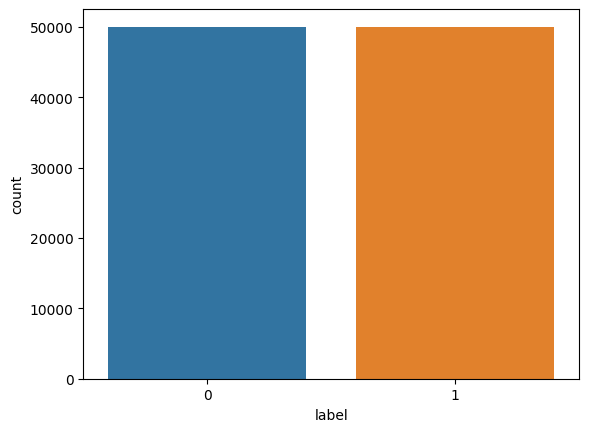

In [21]:
sns.countplot(x='label', data=df_train)
plt.show()


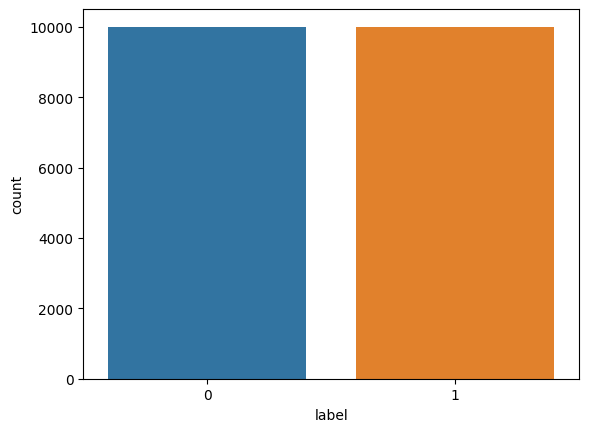

In [22]:
sns.countplot(x='label', data=df_test)
plt.show()


two dataframe are balanced

check text length

In [23]:
df_train['text_length'] = df_train['text'].apply(len)
df_train.head()

,text,label,text_length
3065142,Great Item!: This tea press prepares a nice cu...,1,135
2215304,Never Looking Back: My only regret is that a n...,1,258
402326,Absolutely Fab!: Dr. Seuss has always been a f...,1,351
1970157,The Tempest Review: The Tempest is a play fill...,1,414
1949880,I hate this toy! Unstable and falls apart: Thi...,0,546


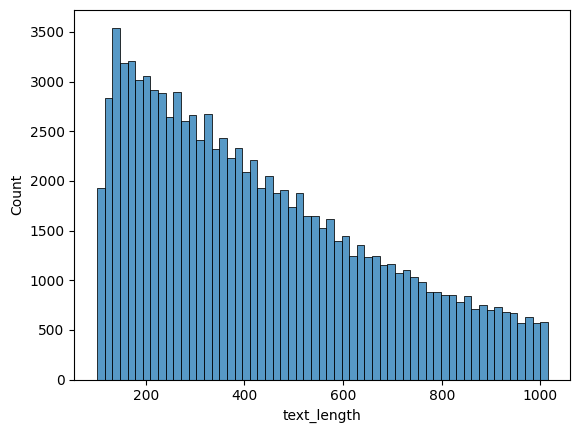

In [24]:
sns.histplot(df_train['text_length'])
plt.show()

most text length is in range 200 characters

In [25]:
df_test['text_length'] = df_test['text'].apply(len)
df_test.head()

,text,label,text_length
181031,To G. Kubrak :....this album is 5 stars: First...,1,382
220001,The Wu-Tang-iest cd ever!: What a great album ...,1,431
183834,Where Is Everyone?: This book was totally awes...,1,336
224027,missing pages: Very disappointed to find that ...,0,226
203654,Persevering in difficult circumstances.: This ...,1,161


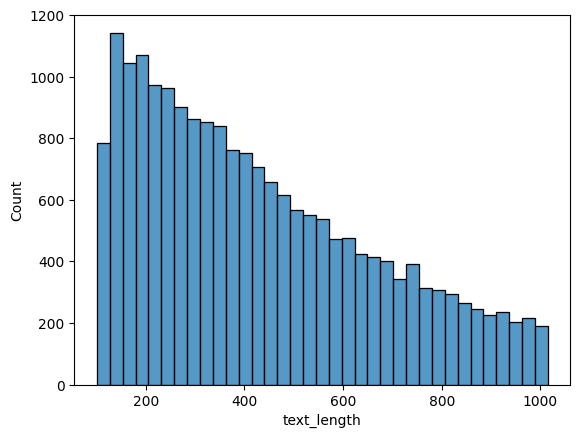

In [26]:
sns.histplot(df_test['text_length'])
plt.show()

most text length is in range 200 characters

Explore correlations between features

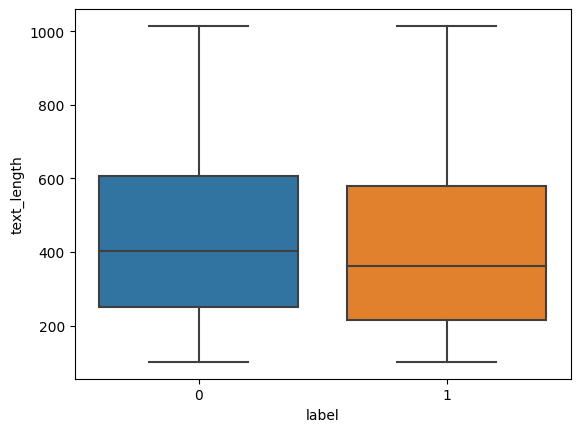

In [27]:
sns.boxplot(x='label', y='text_length', data = df_train)
plt.show()

most text length is in range 400 characters

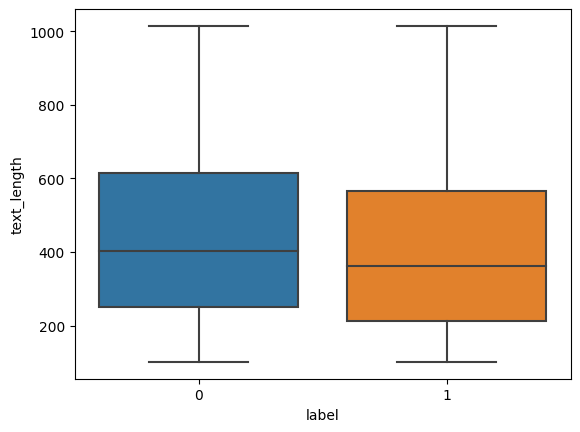

In [28]:
sns.boxplot(x='label', y='text_length', data = df_test)
plt.show()

most text length is in range 400 characters

# Data Preparation

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
def preprocess_text_series(series):
    # Regular expression substitutions
    series = series.str.replace('\d', '0')
    series = series.str.replace(r"([^ ]+(?<=\.[a-z]{3}))", "<url>")

    # Remove stop words and apply stemming and lemmatization
    stop_words = set(stopwords.words('english'))
    excluding = ['againts', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                 "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn',
                 "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't",
                 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    stop_words = [word for word in stop_words if word not in excluding]

    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Tokenize the text
    words = series.str.split()

    # Remove stop words, apply stemming, and lemmatization
    filtered_words = [
        ' '.join([lemmatizer.lemmatize(ps.stem(word.lower())) for word in words if word.lower() not in stop_words])
        for words in words
    ]

    return filtered_words

In [31]:
# df_train['cleaned_text'] = df_train['text'].apply(preprocess_text)
df_train['cleaned_text'] = preprocess_text_series(df_train['text'])
df_train.head()

<ipython-input-30-4e9dbe8be2e7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  series = series.str.replace('\d', '0')
<ipython-input-30-4e9dbe8be2e7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  series = series.str.replace(r"([^ ]+(?<=\.[a-z]{3}))", "<url>")


,text,label,text_length,cleaned_text
3065142,Great Item!: This tea press prepares a nice cu...,1,135,great item!: tea press prepar nice cup tea. ea...
2215304,Never Looking Back: My only regret is that a n...,1,258,never look back: regret newer kindl came week ...
402326,Absolutely Fab!: Dr. Seuss has always been a f...,1,351,absolut fab!: dr. seuss ha alway favorit mine ...
1970157,The Tempest Review: The Tempest is a play fill...,1,414,"tempest review: tempest play fill deceit, mani..."
1949880,I hate this toy! Unstable and falls apart: Thi...,0,546,hate toy! unstabl fall apart: toy unstabl mode...


In [32]:
# df_test['cleaned_text'] = df_test['text'].apply(preprocess_text)
df_test['cleaned_text'] = preprocess_text_series(df_test['text'])
df_test.head()

<ipython-input-30-4e9dbe8be2e7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  series = series.str.replace('\d', '0')
<ipython-input-30-4e9dbe8be2e7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  series = series.str.replace(r"([^ ]+(?<=\.[a-z]{3}))", "<url>")


,text,label,text_length,cleaned_text
181031,To G. Kubrak :....this album is 5 stars: First...,1,382,"g. kubrak <url> album 0 stars: first all, woul..."
220001,The Wu-Tang-iest cd ever!: What a great album ...,1,431,wu-tang-iest cd ever!: great album great group...
183834,Where Is Everyone?: This book was totally awes...,1,336,"everyone?: book total awesome! nick skye, two ..."
224027,missing pages: Very disappointed to find that ...,0,226,miss pages: disappoint find son got end third ...
203654,Persevering in difficult circumstances.: This ...,1,161,persev difficult circumstances.: great stori h...


Split text

In [33]:
X_train, X_test, y_train, y_test = df_train['cleaned_text'], df_test['cleaned_text'], df_train['label'], df_test['label']
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (100000,)
X_test: (20000,)
y_train: (100000,)
y_test: (20000,)


Tokenize the text data

In [34]:
max_features = 10000

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenizer

In [35]:
total_words = len(tokenizer.word_index) + 1
total_words

121135

Convert text to sequences and pad them

In [36]:
maxlen = 100

X_train_sequences = pad_sequences(tokenizer.texts_to_sequences(X_train),
                                  maxlen=maxlen)
X_train_sequences

array([[   0,    0,    0, ...,    6,  501, 1829],
       [   0,    0,    0, ...,  137,  344,  179],
       [   0,    0,    0, ..., 1606,  617,  216],
       ...,
       [   0,    0,    0, ...,  426,  436, 1040],
       [   0,    0,    0, ...,  218,   12, 2558],
       [   0,    0,    0, ...,    7,  514, 2669]], dtype=int32)

In [37]:
X_test_sequences = pad_sequences(tokenizer.texts_to_sequences(X_test),
                                 maxlen=maxlen)
X_test_sequences

array([[   0,    0,    0, ..., 1730, 3333,  289],
       [   0,    0,    0, ...,   10,    6,   32],
       [   0,    0,    0, ...,  317,  100,   35],
       ...,
       [   0,    0,    0, ...,  364,  683, 1269],
       [   0,    0,    0, ...,   13,  179,  240],
       [   0,    0,    0, ...,  771,  823, 1308]], dtype=int32)

# Build LSTM Model

In [38]:
from tensorflow.keras import models, layers, optimizers
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [39]:
model = models.Sequential()
model.add(layers.Embedding(total_words, output_dim=64))
model.add(layers.LSTM(100))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          7752640   
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 7818741 (29.83 MB)
Trainable params: 7818741 (29.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the Model

In [42]:
# Train the model
hist = model.fit(X_train_sequences,
          y_train,
          epochs=5,
          validation_data=(X_test_sequences, y_test))
hist

Epoch 1/5
3125/3125 [==============================] - 553s 176ms/step - loss: 0.2964 - accuracy: 0.8778 - val_loss: 0.2470 - val_accuracy: 0.9039
Epoch 2/5
3125/3125 [==============================] - 545s 174ms/step - loss: 0.2050 - accuracy: 0.9212 - val_loss: 0.2401 - val_accuracy: 0.9057
Epoch 3/5
3125/3125 [==============================] - 539s 172ms/step - loss: 0.1625 - accuracy: 0.9391 - val_loss: 0.2501 - val_accuracy: 0.9072
Epoch 4/5
3125/3125 [==============================] - 544s 174ms/step - loss: 0.1295 - accuracy: 0.9526 - val_loss: 0.2690 - val_accuracy: 0.9037
Epoch 5/5
3125/3125 [==============================] - 542s 173ms/step - loss: 0.1014 - accuracy: 0.9640 - val_loss: 0.3035 - val_accuracy: 0.8967


# Displaying Metrics for trian and test set

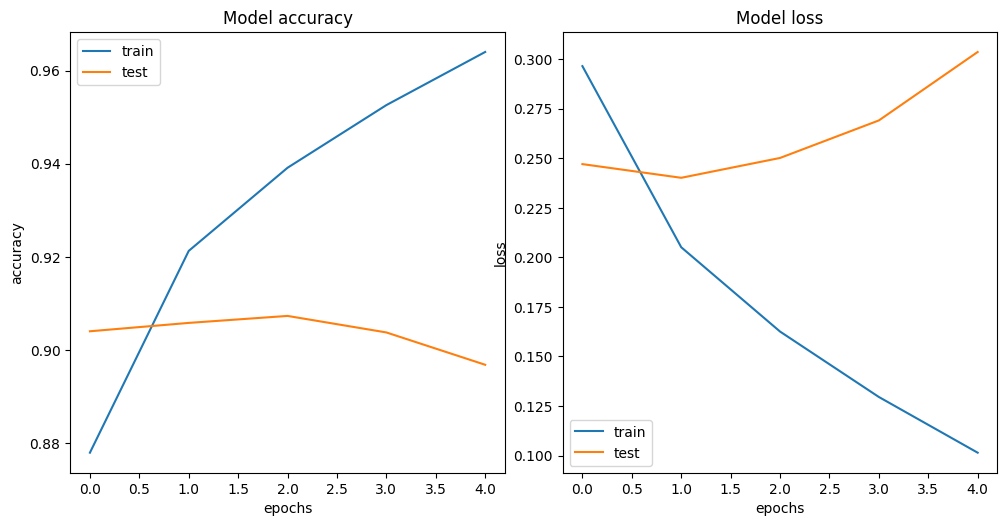

In [43]:
def show_metrics(hist):
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax = ax.ravel()
    plt.tight_layout()

    for i, metr in enumerate(['accuracy', 'loss']):
        ax[i].plot(hist.history[metr])
        ax[i].plot(hist.history['val_' + metr])
        ax[i].set_title(f'Model {metr}')
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(metr)
        ax[i].legend(['train', 'test'])

    plt.show()

show_metrics(hist)

# Evaluate Model Performance

In [44]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

accuracy score

In [45]:
preds = model.predict(X_test_sequences)
test_acc = np.round(accuracy_score(y_test, np.round(preds)) * 100, 2)
test_acc

625/625 [==============================] - 18s 28ms/step


89.68

In [46]:
train_acc = np.round((hist.history['accuracy'][-1] * 100, 2))[0]
train_acc

96.0

Classification report for Precision, Recall and F1-score

In [47]:
cr = classification_report(y_test, np.round(preds))
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      9998
           1       0.90      0.89      0.90     10002

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



Confusion matrix

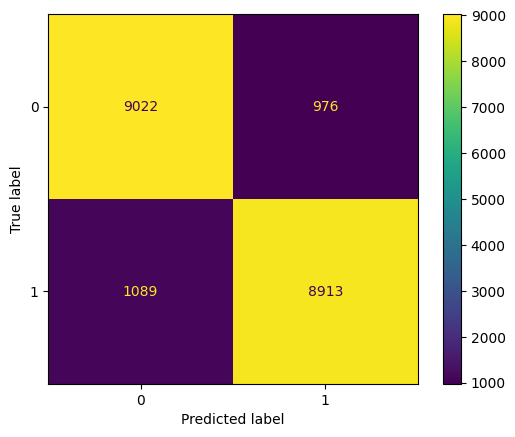

In [48]:
cm = confusion_matrix(y_test, np.round(preds))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()